In [1]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
%matplotlib inline
import seaborn as sns

import sys,os,pdb,copy,pickle
from importlib import reload
import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)
import raster_new as rn
import data_prep_pyn as dpp
import database
db = database.db

ModuleNotFoundError: No module named 'raster_new'

In [ ]:
data_dir_full=db.query('owner=="roman"')['data_dir_full'][0]
data_dir_full
db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)

In [ ]:
# data_dir_full = '/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/'
data_dir_full = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)['data_dir_full'][0]

In [ ]:
# load data
mat_to_return=prep.load_stuff(data_dir_full,sessionPulses = '*SessionPulses.Events.mat',filtered='*thetaFiltered*.mat')
# sessionPulses=mat_to_return['sessionPulses']
filtered = mat_to_return['filtered']
behavior=mat_to_return['behavior']

prep_res = dpp.load_spk_beh_df(data_dir_full,force_reload=False,extra_load={})
spk_beh_df=prep_res['spk_beh_df']
cell_cols_d = prep_res['cell_cols_d']
beh_df = prep_res['beh_df'].as_dataframe()
beh_df_d,beh_df=dpp.group_into_trialtype(beh_df)


In [ ]:
spike_trains=prep_res['spike_trains']


In [ ]:
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
import cluster_spikes as cs
reload(cs)

In [198]:
# from scipy.interpolate import interp1d
# from collections import OrderedDict
# def get_time_label_function(beh_df,label=['lin']):
#     fs = pd.DataFrame(beh_df).groupby('task_index').apply(lambda x:interp1d(x.index,x[label],axis=0))
#     return fs

# def restrict_spike_trains_one_interval(spike_trains,interval):
#     ep = nap.IntervalSet(start=interval[0],end=interval[1])
#     spike_trains_restricted = spike_trains.restrict(ep)
#     return spike_trains_restricted

# def restrict_spike_trains(spike_trains,beh_df,groupby_key='task_index'):
#     gpb = beh_df.groupby(groupby_key)
#     spike_trains_restricted_grouped = {}
#     for k,val in gpb:
#         interval = (val.index[0],val.index[-1])
#         spike_trains_restricted_grouped[k] = restrict_spike_trains_one_interval(spike_trains,interval)
#     return spike_trains_restricted_grouped

# def get_spike_triggered_label(spike_trains,beh_df,label=['lin'],groupby_key='task_index'):
#     '''
#     spike_trains and the fs should have the same grouping
#     '''
#     fs = get_time_label_function(beh_df,label=label)
#     spike_trains_restricted_grouped=restrict_spike_trains(spike_trains,beh_df,groupby_key=groupby_key)
#     spike_trains_with_label_d = {}
#     for k,val in spike_trains_restricted_grouped.items():
        
# #         spike_trains_with_label=nap.TsGroup({k_one:nap.Tsd(val_one.times(),d=fs[k](val_one)) for k_one, val_one in val.items()})
#         spike_trains_with_label = OrderedDict({k_one: pd.DataFrame(fs[k](val_one.times()),index=val_one.times(),columns=label) for k_one, val_one in val.items()})
#         spike_trains_with_label_d[k] = spike_trains_with_label
#     return spike_trains_with_label_d
        
    

# def cluster_one_spike_train_one_label():
#     pass

# PREPROCESS SPIKE TRAINGs

In [204]:

reload(dpp)
reload(cs)
theta_df=dpp.get_theta_df(filtered)
# spike_trains_with_label = cs.get_spike_triggered_label(spike_trains,beh_df,label=['lin','x','y','speed'],groupby_key='task_index',theta_df=theta_df)

spike_trains_with_label = cs.get_spike_triggered_label(spike_trains,beh_df,label=['lin','x','y','speed'],groupby_key='trial_type',theta_df=theta_df)



/mnt/home/szheng/projects/pynapple/pynapple/core/time_series.py:154: RuntimeWarning: invalid value encountered in double_scalars
  self.rate = len(t) / self.time_support.tot_length("s")
/mnt/home/szheng/projects/pynapple/pynapple/core/time_series.py:154: RuntimeWarning: invalid value encountered in double_scalars
  self.rate = len(t) / self.time_support.tot_length("s")


In [47]:
cell_cols_d['pyr']

array([  1.,   2.,   3.,  27.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,
        36.,  37.,  38.,  39.,  40.,  41.,  43.,  44.,  45.,  46.,  48.,
        52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  62.,  67.,  68.,
        81.,  82.,  83.,  84.,  85.,  87.,  88.,  89.,  90.,  91.,  92.,
        93.,  94.,  96.,  97.,  98.,  99., 100., 101., 102., 103., 104.,
       105., 106., 107., 109., 110., 111., 112., 113., 114., 115., 116.,
       117., 118., 119., 120., 121., 122., 123., 124., 125., 126., 127.,
       128., 129., 130., 131., 132., 133., 134., 135., 136., 137., 139.,
       140., 143., 144., 145., 146., 148., 149., 150., 151., 152., 153.,
       154., 155., 156., 157., 158., 159., 160., 161., 162., 163., 164.,
       165., 166., 167., 168., 169., 170., 171., 172., 173., 174., 175.,
       176., 177., 178., 179., 180., 181., 182., 183., 185., 186., 187.,
       188., 189., 190., 191., 192., 193., 194., 195., 196., 197., 198.,
       200., 201., 202., 203., 204., 205., 206., 20

In [141]:
reload(cs)
reload(rn)

<module 'raster_new' from '/mnt/home/szheng/projects/cluster_spikes/raster_new.py'>

## Cluster lin, seperated by trialtype

In [207]:
import bayesian_gmm as bgmm
reload(bgmm)
reload(cs)

<module 'cluster_spikes' from '/mnt/home/szheng/projects/cluster_spikes/cluster_spikes.py'>

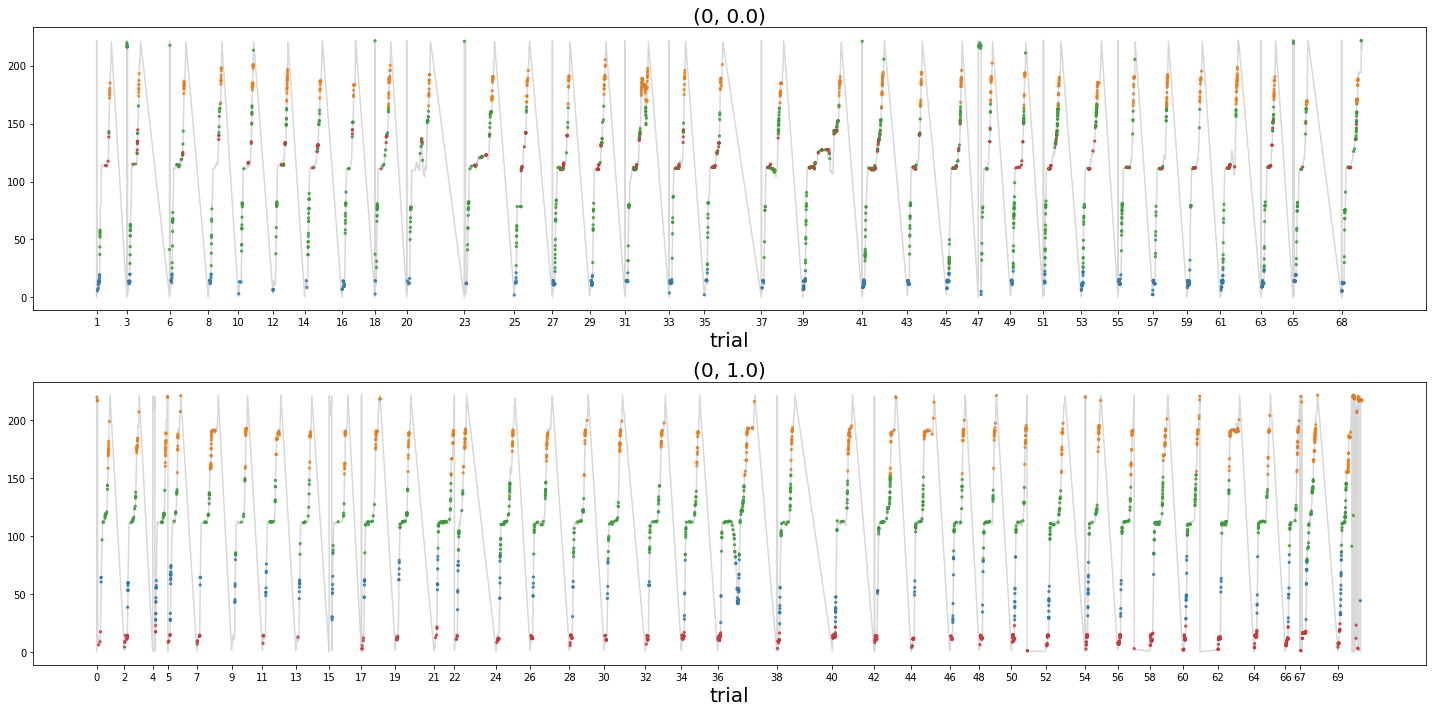

In [243]:
%matplotlib inline
uid = 32
task_index=0
reload(cs)

# spk_and_label = spike_trains_with_label[task_index][uid]
# spk_and_label = spike_trains_with_label[trial_type][uid]
# model,clust,color=cs.cluster_one_spike_train(spk_and_label,labels=['x','y'])
# model,clust,color=cs.cluster_one_spike_train(spk_and_label,labels=['x','y'])

spk_and_label_d = {}
color_d={}
n_compo=4
for k,sp in spike_trains_with_label.items():
    spk_and_label_d[k]=sp[uid]
#     spk_and_label_d[k] = spk_and_label_d[k].query('speed>5') # speed thresh
    model,clust,color=cs.cluster_one_spike_train(spk_and_label_d[k],n_compo,labels=['lin','theta_phase'],model_class=bgmm.BGMM,mean_precision_prior_array=np.array([0.1,10000.]))
    color_d[k] = color
    spk_and_label_d[k]['clust']=clust
fig,axs=rn.plot_raster_with_lin(uid,spike_trains_with_label,beh_df,spk_groupby='trial_type',s=5,c=color_d)



In [224]:
gammas=model.predict_proba(spk_and_label_d[k][['lin','theta_phase']])

In [235]:
np.nonzero((gammas>0.5)&(gammas<0.6))

(array([  15,   26,   27,   28,   29,   30,   31,   51,   76,   77,  127,
         128,  129,  130,  131,  153,  159,  160,  213,  400,  401,  557,
         863,  976, 1000, 1001, 1002, 1086, 1087, 1089, 1090, 1091, 1092,
        1188, 1189, 1370, 1390, 1391, 1399, 1400, 1481, 1554, 1647, 1674,
        1679, 1861, 1862, 1863, 1865, 1866, 1933, 1934, 1935, 1936, 1942,
        1943, 1989, 1990, 1991, 1992, 1993, 2067, 2068, 2069, 2070, 2071,
        2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2124, 2133,
        2134, 2194, 2242, 2245, 2246, 2349, 2467]),
 array([0, 3, 1, 1, 1, 1, 1, 0, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 3, 2, 2, 1,
        2, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 0, 3, 1, 1, 1, 1, 2, 0, 1,
        1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 3, 3]))

(array([7294.,  132.,  219.,   92.,   77.,   84.,  196.,   45.,   82.,
        2159.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

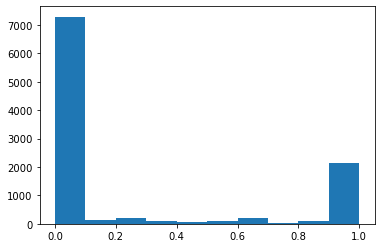

In [229]:
plt.hist(gammas.flatten())

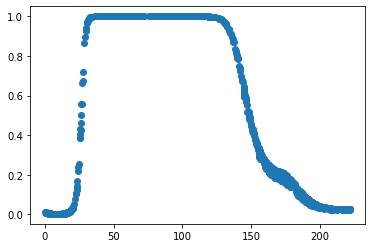

In [241]:
plt.scatter(spk_and_label_d[k]['lin'],gammas[:,3])

In [211]:
model.mean_prior_

array([96.09835471,  3.00515695])

In [212]:
model.mean_precision_prior_array

array([1.e-01, 1.e+04])

In [213]:
sklearn.mixture._gaussian_mixture

<module 'sklearn.mixture._gaussian_mixture' from '/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/mixture/_gaussian_mixture.py'>

In [214]:
model.mean_prior_

array([96.09835471,  3.00515695])

## cluster not seperated by trialtype

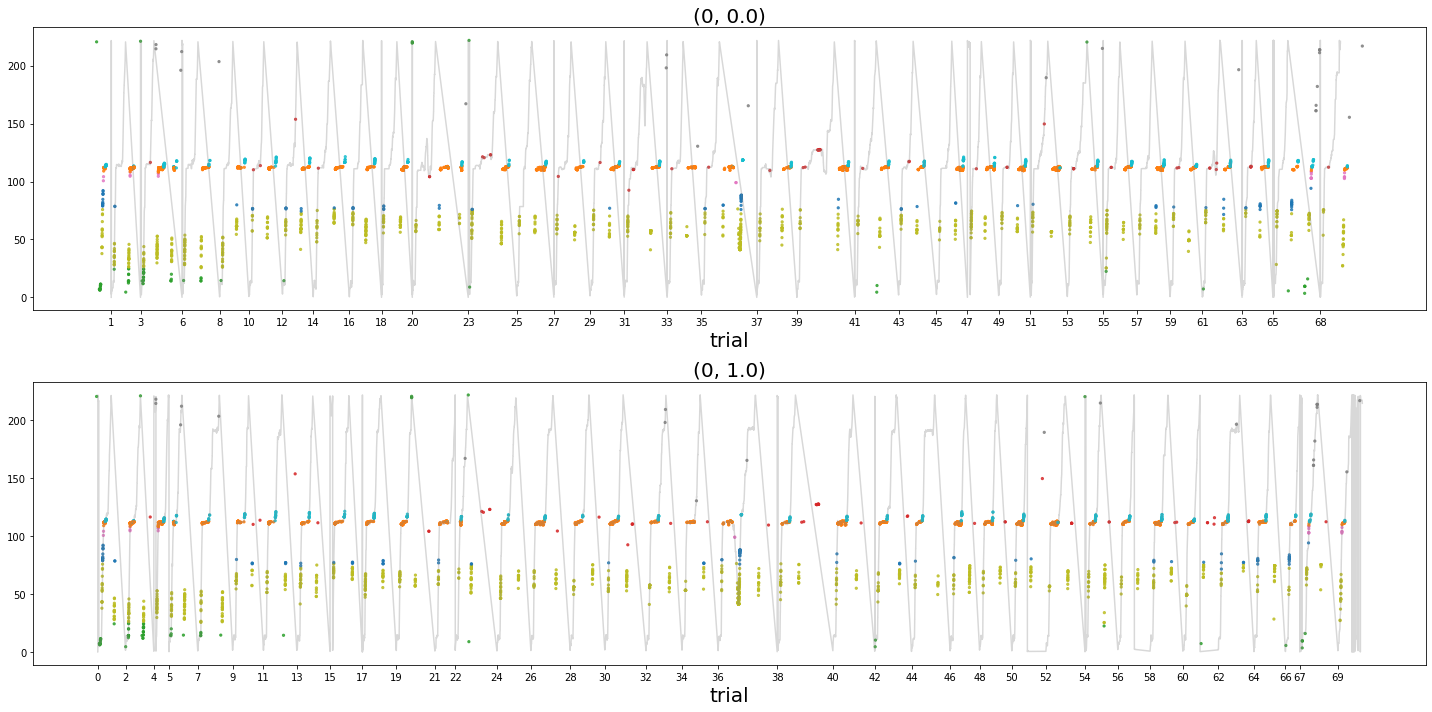

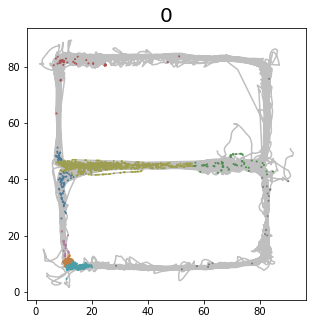

In [236]:
%matplotlib inline
import raster_new as rn
reload(rn)

uid = 191
task_index=0
reload(cs)

spk_and_label = spike_trains_with_label[task_index][uid]
# spk_and_label = spike_trains_with_label[trial_type][uid]
# model,clust,color=cs.cluster_one_spike_train(spk_and_label,labels=['x','y'])
model,clust,color=cs.cluster_one_spike_train(spk_and_label,n_compo,labels=['x','y'])
spk_and_label['clust'] = clust


fig,axs=rn.plot_raster_with_lin(uid,spike_trains_with_label,beh_df,s=5,c=color)
# fig,axs=rn.plot_raster_with_lin(191,spike_trains_with_label,beh_df,fig=fig,axs=axs,c='C1',s=5)
fig2,axs2 = rn.plot_raster_2d(uid,spike_trains_with_label,beh_df ,c=color,fig=None,axs=None)

<IPython.core.display.Javascript object>


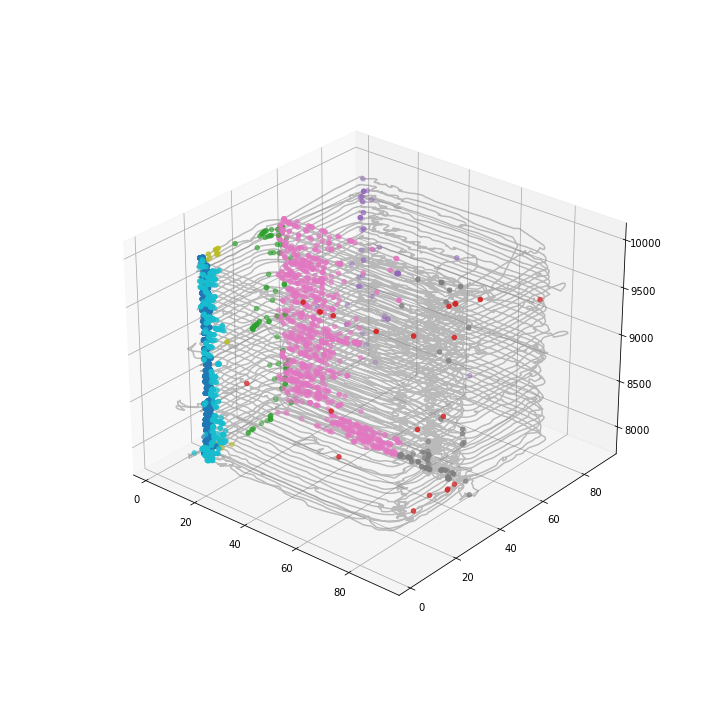

In [210]:
%matplotlib notebook
reload(rn)
fig=rn.plot_raster_2d_in_trial(uid, spike_trains_with_label, beh_df, c=color,fig=None,ax=None)


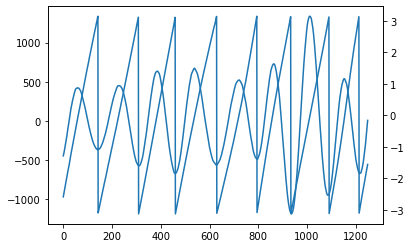

In [225]:
%matplotlib inline
fig,ax=plt.subplots()
ax.plot(filtered['data'][(filtered['timestamps']>7890) &(filtered['timestamps']<7891)])
ax2=ax.twinx()
ax2.plot(filtered['phase'][(filtered['timestamps']>7890) &(filtered['timestamps']<7891)])

In [214]:
theta_df

,theta_phase,theta_amp
0.0000,-0.631512,1059.483830
0.0008,0.010847,811.727733
0.0016,0.058029,755.645203
0.0024,0.352500,769.060943
0.0032,0.432232,735.153736
...,...,...
16561.9488,-1.822036,97.960851
16561.9496,-1.941521,67.808385
16561.9504,-1.696162,217.635668
16561.9512,-1.714575,184.420729


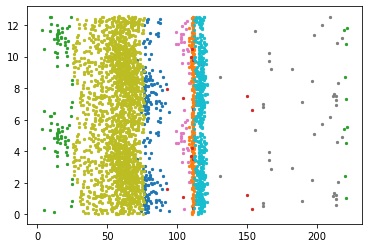

In [237]:
gpb=spk_and_label.groupby('clust')
fig,ax=plt.subplots()
for ii,(k,val) in enumerate(gpb):
    val = val.query('speed>5')
    rn.plot_phase_precession_one_field(val['lin'],val['theta_phase'],c=f'C{k}',ax=ax,fig=fig)

In [240]:
model.mean_prior_

array([16.7, 22.1])

In [335]:
reload(bgmm)
reload(cs)

<module 'cluster_spikes' from '/mnt/home/szheng/projects/cluster_spikes/cluster_spikes.py'>

In [365]:
for k,sp in spike_trains_with_label.items():
    spk_and_label_d[k]=sp[uid]
    spk_and_label_d[k] = copy.copy(spk_and_label_d[k].query('speed>5')) # speed thresh
    spk_and_label_d[k]['theta_phase_cos'] = np.cos(spk_and_label_d[k]['theta_phase'])
    spk_and_label_d[k]['theta_phase_sin'] = np.sin(spk_and_label_d[k]['theta_phase'])
    n_compo=5
#     covariance_prior=np.array([[200,-15],[-15,3]])
    covariance_prior=None
    model,clust,color=cs.cluster_one_spike_train(spk_and_label_d[k],n_compo,labels=['lin','theta_phase'],model_class=bgmm.BGMM,mean_precision_prior_array=np.array([0.1,10000.]),covariance_prior = covariance_prior)
#     model,clust,color=cs.cluster_one_spike_train(spk_and_label_d[k],n_compo,labels=['lin','theta_phase_cos','theta_phase_sin'],model_class=bgmm.BGMM,mean_precision_prior_array=np.array([0.1,10000.,10000.]))
    color_d[k] = color
    spk_and_label_d[k]['clust']=clust
    
    

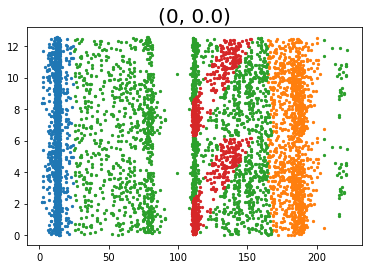

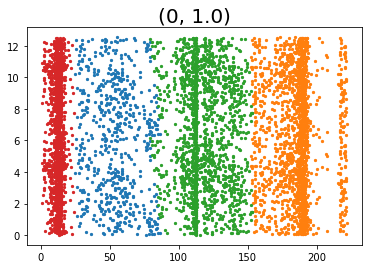

In [244]:
for key, spk_and_label in spk_and_label_d.items():
    gpb=spk_and_label.groupby('clust')
    fig,ax=plt.subplots()
    for ii,(k,val) in enumerate(gpb):
        rn.plot_phase_precession_one_field(val['lin'],val['theta_phase'],c=f'C{k}',ax=ax,fig=fig)
    ax.set_title(key)

In [364]:
model.lower_bound_

-12907.089913189413

In [344]:
model.lower_bound_

-12925.130394534452

In [126]:

reload(rn)

<module 'raster_new' from '/mnt/home/szheng/projects/cluster_spikes/raster_new.py'>

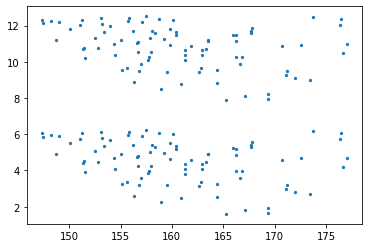

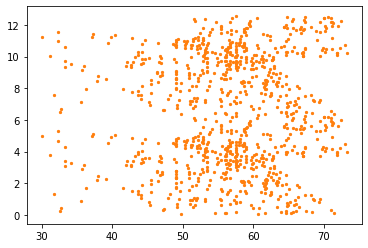

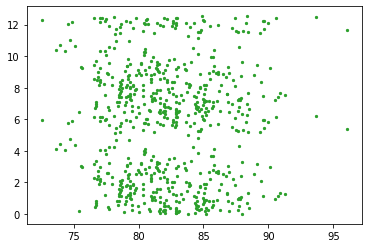

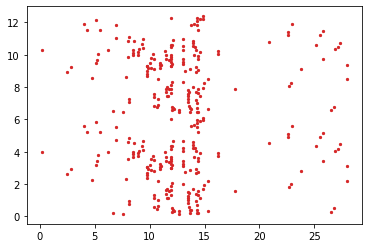

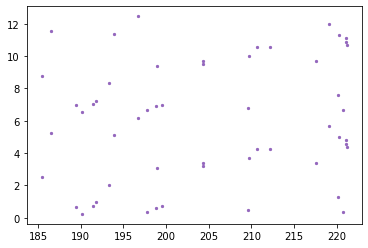

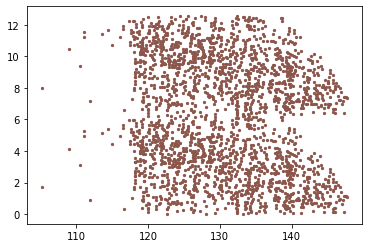

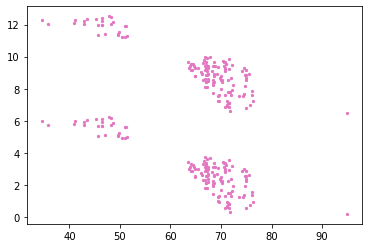

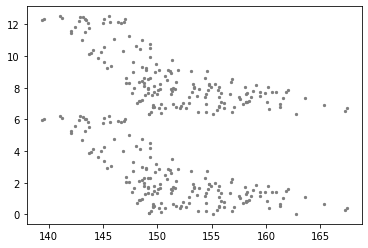

In [299]:
# gpb=spk_and_label.groupby('clust')
gpb=spk_and_label_d[key].groupby('clust')
# fig,ax=plt.subplots()
for ii,(k,val) in enumerate(gpb):
    val = val.query('speed>5')
    fig,ax=plt.subplots()
    rn.plot_phase_precession_one_field(val['lin'],val['theta_phase'],c=f'C{ii}',ax=ax,fig=fig)

In [54]:
import matplotlib as mpl
import itertools
from scipy import linalg
color_iter = itertools.cycle(["navy", "c", "cornflowerblue", "gold", "darkorange"])

def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180.0 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

#     plt.xlim(-9.0, 5.0)
#     plt.ylim(-3.0, 6.0)
#     plt.xticks(())
#     plt.yticks(())
    plt.title(title)

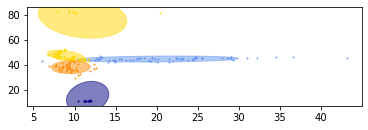

In [55]:
plot_results(spk_and_label[['x','y']].values,clust,model.means_,model.covariances_,0,'')

In [56]:
spk_and_label.groupby('clust')[['x','y']].mean()

,x,y
clust,,
0,11.497135,11.199828
2,20.773601,44.683906
3,10.738366,82.068975
8,8.957180,47.225459
9,9.405580,37.483376


In [62]:
np.set_printoptions(precision=2,suppress=True)

In [63]:
model.predict_proba(spk_and_label.loc[clust==8,['x','y']])

array([[0.  , 0.  , 0.29, 0.  , 0.  , 0.  , 0.  , 0.  , 0.5 , 0.21],
       [0.  , 0.  , 0.21, 0.  , 0.  , 0.  , 0.  , 0.  , 0.5 , 0.29],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.57, 0.19],
       [0.  , 0.  , 0.21, 0.  , 0.  , 0.  , 0.  , 0.  , 0.58, 0.21],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.01],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.01],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.01],
       [0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.97, 0.02],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.98, 0.01],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.26, 0.  , 0.

# mixture of linear regression!

In [7]:
sys.path.append('/mnt/home/szheng/projects/cluster_spikes/linear-regressions-mixture/src')
import linear_regression_mixtures
from linear_regression_mixtures import LinearRegressionsMixture

In [480]:
model_d = {}
for k,sp in spike_trains_with_label.items():
    spk_and_label_d[k]=sp[uid]
    spk_and_label_d[k] = copy.copy(spk_and_label_d[k].query('speed>5')) # speed thresh
    n_compo=5
    covariance_prior=None
#     model,clust,color=cs.cluster_one_spike_train(spk_and_label_d[k],n_compo,labels=['lin','theta_phase'],model_class=bgmm.BGMM,mean_precision_prior_array=np.array([0.1,10000.]),covariance_prior = covariance_prior)
#     model = LinearRegressionsMixture(spk_and_label_d[k]['lin'].values[:,None],spk_and_label_d[k]['theta_phase'].values[:,None],K=n_compo)
    model = LinearRegressionsMixture(spk_and_label_d[k]['theta_phase'].values[:,None],spk_and_label_d[k]['lin'].values[:,None],K=n_compo)
    model.train(epsilon=1e-4, lam=0.0001, iterations=100, random_restarts=1, verbose=False)
    model_d[k] = model
#     color_d[k] = color
#     spk_and_label_d[k]['clust']=clust
    
    

Random restarts (1/1): [####################] 100% Elapsed time: 0:00:00
Random restarts (1/1): [####################] 100% Elapsed time: 0:00:00


In [481]:
model_d[(0,0)].__dict__

{'name': 'LinearRegressionsMixture (5 components)',
 'X': array([[3.52],
        [3.7 ],
        [4.91],
        ...,
        [4.18],
        [4.6 ],
        [4.29]]),
 'y': array([[  9.91],
        [  2.78],
        [  4.46],
        ...,
        [170.82],
        [190.84],
        [221.76]]),
 'K': 5,
 'lam': 0.0001,
 'iterations': 100,
 'epsilon': 0.0001,
 'N': 2199,
 'D': 1,
 'w': array([[114.81, 114.77, 114.73, 114.74, 114.7 ],
        [ -1.94,  -2.03,  -1.99,  -1.97,  -1.87]]),
 'pi': array([0.2 , 0.2 , 0.2 , 0.2 , 0.21]),
 'gamma': array([[0.2 , 0.2 , 0.2 , 0.2 , 0.2 ],
        [0.2 , 0.2 , 0.2 , 0.2 , 0.2 ],
        [0.2 , 0.2 , 0.2 , 0.2 , 0.2 ],
        ...,
        [0.2 , 0.19, 0.2 , 0.2 , 0.21],
        [0.2 , 0.19, 0.2 , 0.2 , 0.21],
        [0.2 , 0.19, 0.2 , 0.2 , 0.21]]),
 'beta': 0.0002638487194434137,
 'marginal_likelihood': -12180.283885858898,
 'trained': True,
 'random_restarts': 1}

In [460]:
model_d[(0,0)].w

array([[ 3.17,  4.05,  1.62,  1.52,  4.04],
       [-0.  , -0.  ,  0.01,  0.01, -0.  ]])

In [461]:
predict_all = spk_and_label_d[k]['theta_phase'].apply(lambda x:model_d[(0,0)].predict(np.array([[x]])))

In [462]:
predict_all

7873.032467     3.169062
7873.567267     3.162596
7882.487167     3.170147
7882.520267     3.166976
7882.718133     3.171215
                  ...   
10006.981233    3.168941
10007.012100    3.166149
10007.016267    3.165771
10007.021367    3.165304
10008.909400    3.164813
Name: theta_phase, Length: 2605, dtype: float64

In [463]:
ss=5
model_d[(0,0)].predict(spk_and_label_d[k]['lin'].values[:,None][ss])


2.9757293974687107

In [464]:
spk_and_label_d[k]['theta_phase'].iloc[ss]

3.182833269405995

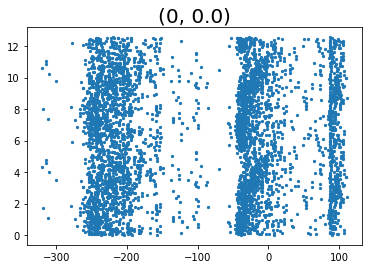

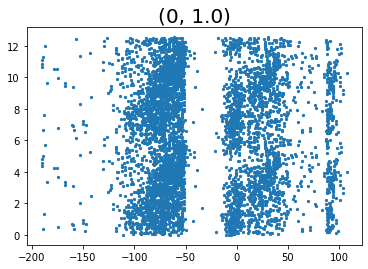

In [477]:
for key, spk_and_label in spk_and_label_d.items():
#     gpb=spk_and_label.groupby('clust')
    fig,ax=plt.subplots()
#     for ii,(k,val) in enumerate(gpb):
    predict_all = spk_and_label_d[key]['lin'].apply(lambda x:model_d[key].predict(np.array([[x]])))
    rn.plot_phase_precession_one_field(predict_all,spk_and_label_d[key]['theta_phase'],ax=ax,fig=fig)
    
    ax.set_title(key)

# sim

In [109]:
reload(linear_regression_mixtures)
from linear_regression_mixtures import LinearRegressionsMixture

In [163]:
# phase_sim = np.concatenate([np.linspace(0,np.pi*2,10),np.linspace(0,np.pi*2,10)])

phase_sim = np.linspace(0,np.pi*2,20)
phase_sim_2 = np.linspace(np.pi*2,np.pi*4,20)
lin_sim_1 = phase_sim * (-20) + 100
# lin_sim_2 = phase_sim * (-20) + 200
lin_sim_2 = phase_sim_2 * -5 + 200

phase_sim = np.concatenate([phase_sim,phase_sim_2])[:,None]
phase_sim = scipy.stats.zscore(phase_sim)
lin_sim = np.concatenate([lin_sim_1,lin_sim_2])[:,None]
lin_sim=scipy.stats.zscore(lin_sim)

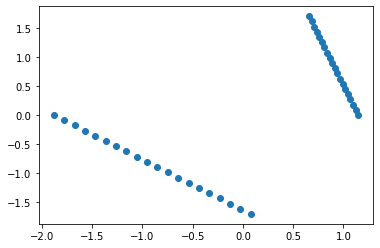

In [164]:
%matplotlib inline
plt.scatter(lin_sim[:,0],phase_sim[:,0])


In [171]:
from sklearn.linear_model import LinearRegression

In [168]:
gmm = GaussianMixture(2)
X_complete = np.concatenate([lin_sim,phase_sim],axis=1)
gmm.fit(X_complete)

GaussianMixture(n_components=2)

In [170]:
gamms = gmm.predict_proba(X_complete)

In [173]:
gamms

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [189]:
linreg_l=[]
n_compo=2
for k in range(n_compo):
    linreg_l.append(LinearRegression())
for k in range(n_compo):
    linreg_l[k].fit(lin_sim,phase_sim.squeeze(),sample_weight=gamms[:,k])


In [190]:
linreg_l[0].__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([-3.49306526]),
 'rank_': 1,
 'singular_': array([0.66430978]),
 'intercept_': 4.003349002086602}

In [192]:
w = np.concatenate([linreg.coef_ for linreg in linreg_l])
b = np.array([linreg.intercept_ for linreg in linreg_l])

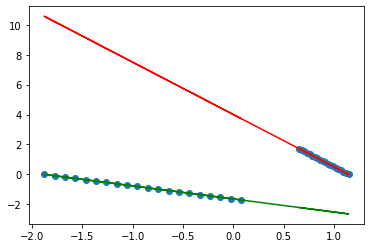

In [199]:
w1 = w
w2 = b
rx = np.concatenate([np.ones_like(lin_sim),lin_sim],axis=1)
r=lin_sim
plt.scatter(lin_sim[:,0],phase_sim[:,0])
plt.plot(r, w[0]*r+b[0], '-r', label="1st component")
plt.plot(r, w[1]*r+b[1], '-g', label="2nd component")

In [ ]:
linreg.fit(lin_sim,phase_sim.squeeze(),sample_weight=)

In [149]:
np.random.dirichlet([1]*2,size=10)

array([[0.37912055, 0.62087945],
       [0.58806345, 0.41193655],
       [0.27750278, 0.72249722],
       [0.03616185, 0.96383815],
       [0.90514648, 0.09485352],
       [0.97623414, 0.02376586],
       [0.7434535 , 0.2565465 ],
       [0.38063551, 0.61936449],
       [0.12343049, 0.87656951],
       [0.1629987 , 0.8370013 ]])

In [150]:
model = LinearRegressionsMixture(lin_sim,phase_sim,K=2)
# model = LinearRegressionsMixture(phase_sim,lin_sim,K=2)
model.train(epsilon=1e-8, lam=0.00001, iterations=100, random_restarts=20, verbose=False)



Random restarts (20/20): [####################] 100% Elapsed time: 0:00:01


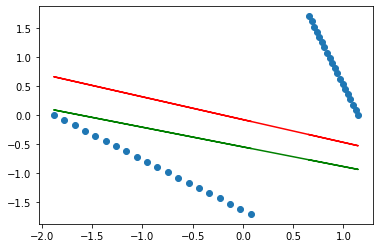

In [154]:
w1 = model.w[:2, 0]
w2 = model.w[:2, 1]
rx = np.concatenate([np.ones_like(lin_sim),lin_sim],axis=1)
r=lin_sim
plt.scatter(lin_sim[:,0],phase_sim[:,0])
plt.plot(r, np.dot(rx, w1), '-r', label="1st component")
plt.plot(r, np.dot(rx, w2), '-g', label="2nd component")

Random restarts (20/20): [####################] 100% Elapsed time: 0:00:01
Model:        LinearRegressionsMixture (2 components)
Likelihood:   -338.51942478771014
Beta:         2.9849669712498836
Lambda:       0.1
Pi:           [0.12500529 0.87499471]
Weights norm: [14.683041431143334, 10.497060585512846]
[[-13.85606204  -8.99812196]
 [ -4.8581118   -5.40574528]]
Posterior probabilities:
p(z=1 | x_new=0.9, y_new=-14.41) = 0.0000
p(z=2 | x_new=0.9, y_new=-14.41) = 1.0000


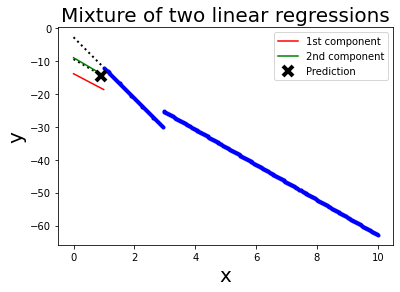

In [162]:
import numpy as np
import matplotlib.pyplot as plt
# from src import LinearRegressionsMixture

# Generate N random input data points
N = 300
# X = np.random.rand(N, 1)
X = np.linspace(1,10,N)[:,None]
tX = np.ones((N, 2))
tX[:, 1] = X[:, 0]

# Generate N random target values
w = -np.random.rand(2, 2) * 10
# w=np.array([[100,0],[-1,-1]])
y = np.zeros(N)
n = int(np.random.rand(1, 1) * N)
# n=int(1/2*N)
y[:n] = np.dot(tX[:n, :], w[0, :]) + np.random.normal(size=n) * .03
y[n:] = np.dot(tX[n:, :], w[1, :]) + np.random.normal(size=N - n) * .01

# Plot the data set
rx = np.ones((100, 2))
r = np.arange(0, 1, .01)
rx[:, 1] = r
plt.plot(tX[:, 1], y, '.b')
plt.plot(r, np.dot(rx, w[0, :]), ':k', linewidth=2)
plt.plot(r, np.dot(rx, w[1, :]), ':k', linewidth=2)

# Model parameters
K = 2
epsilon = 1e-4
lam = 0.1
iterations = 50
random_restarts = 20

# Train the model
model = LinearRegressionsMixture(X, np.expand_dims(y, axis=1), K=K)
model.train(epsilon=epsilon, lam=lam, iterations=iterations, random_restarts=random_restarts, verbose=False)
print(model)

# Plot results
w1 = model.w[:2, 0]
w2 = model.w[:2, 1]
plt.plot(r, np.dot(rx, w1), '-r', label="1st component")
plt.plot(r, np.dot(rx, w2), '-g', label="2nd component")

# New point
x_new = [0.9]
y_new, y_posteriors = model.predict(x_new, posteriors=True)
plt.plot(x_new, y_new, 'kx', mew=4, ms=10, label="Prediction")
print("Posterior probabilities:")
print("p(z=1 | x_new=%s, y_new=%0.2f) = %0.4f" % (x_new[0], y_new, y_posteriors[0]))
print("p(z=2 | x_new=%s, y_new=%0.2f) = %0.4f" % (x_new[0], y_new, y_posteriors[1]))

plt.title("Mixture of two linear regressions")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(numpoints=1, loc='best')
plt.savefig('result.pdf')